In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Spotify_Youtube.csv')
df.columns

numerical = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness",
              "Liveness", "Valence", "Tempo", "Duration_ms", "Views", "Likes", "Comments", "Stream"]
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

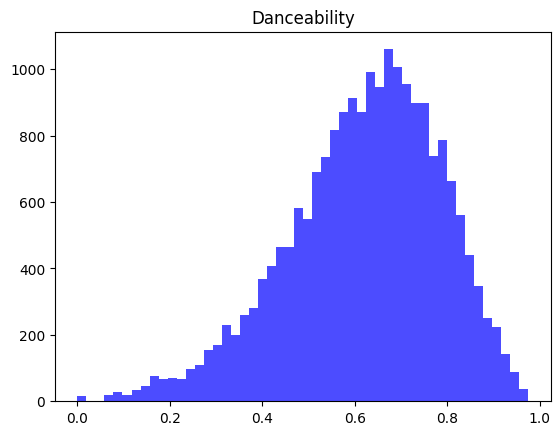

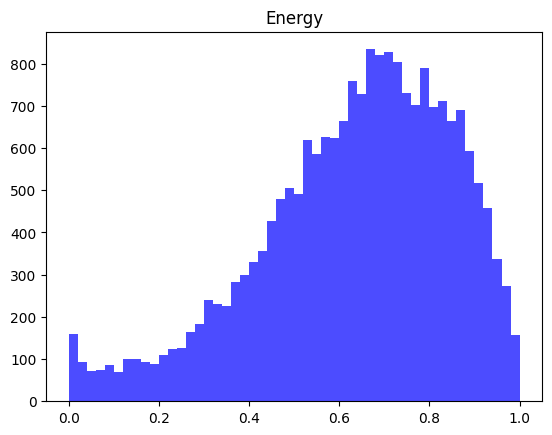

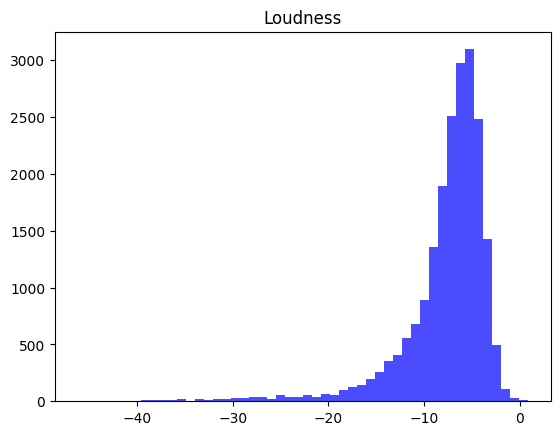

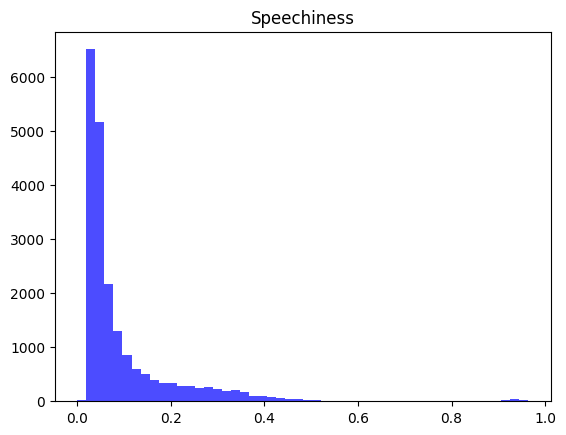

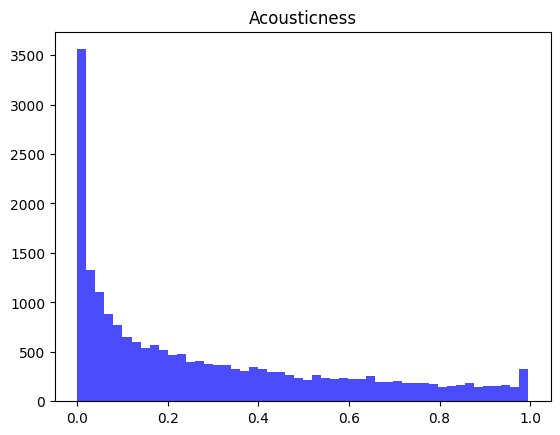

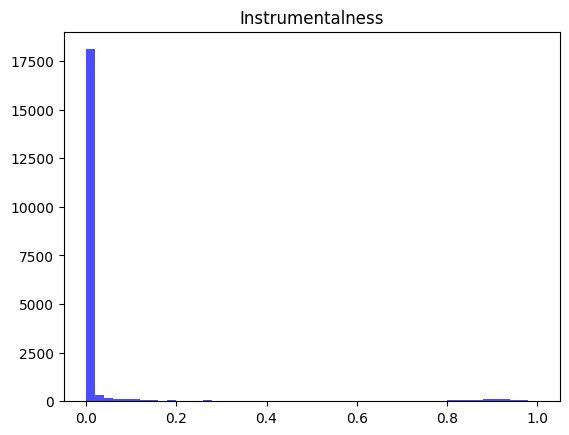

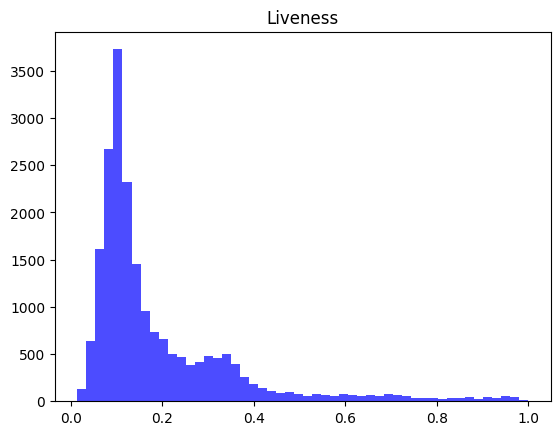

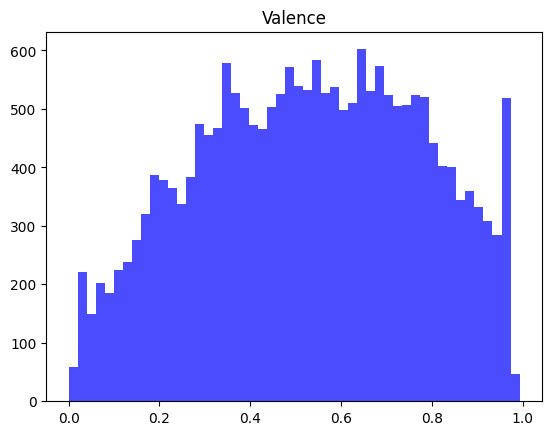

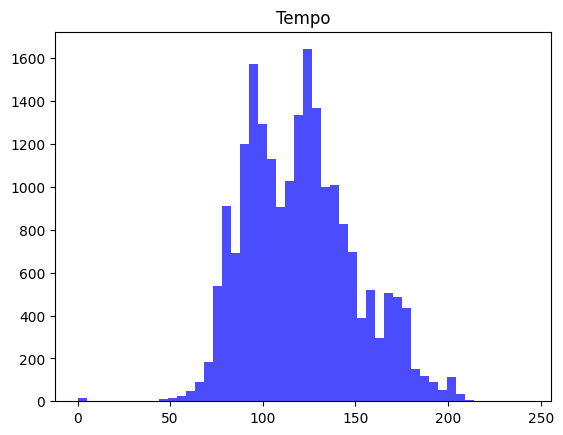

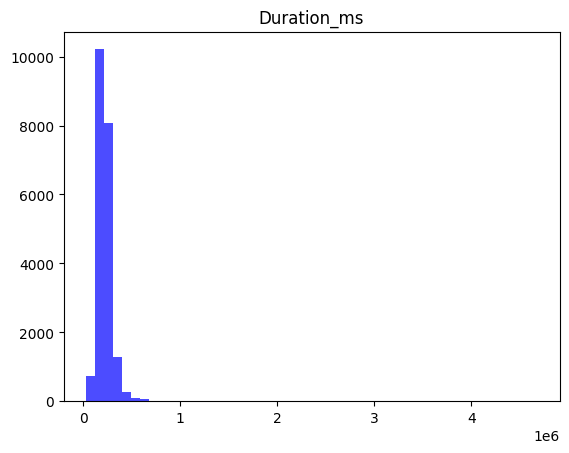

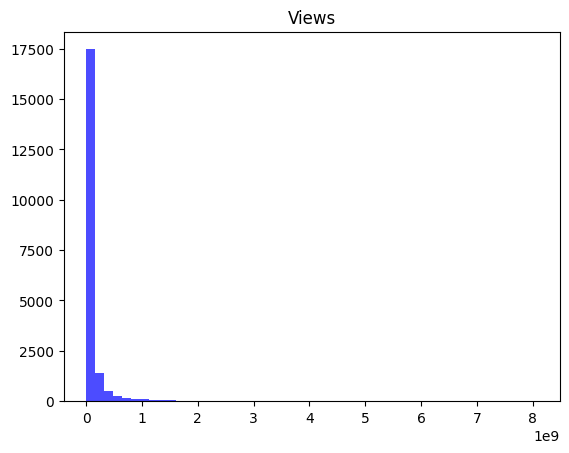

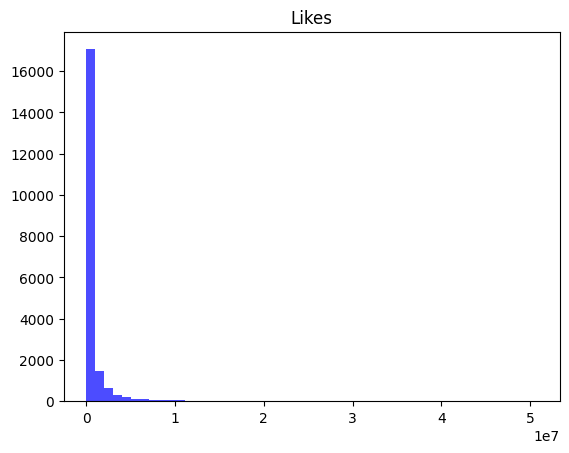

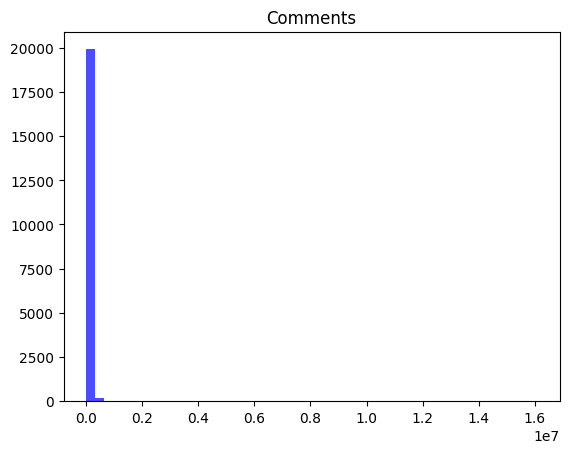

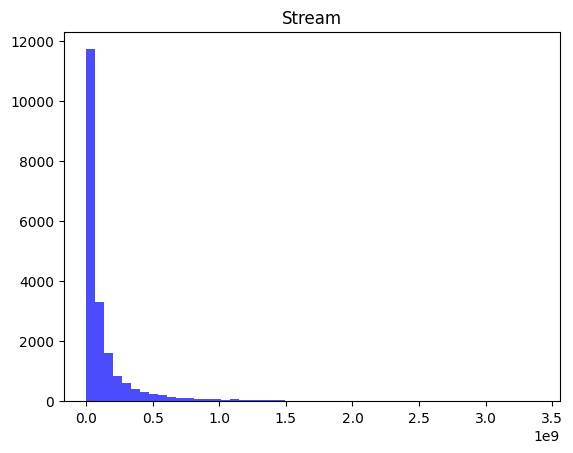

In [13]:
#for each numerical column, create a histogram
for column in numerical:
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(column)
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    plt.show()


Based on the histogram, 
the following seem to be aproximately normally distributed:
danceability, energy, valence, tempo
the following seem to be skewed in one direction:
loudness, speechiness, acousticness, instrumentalness, liveliness
the following seem to be skewed, and also have outliers that are logarithmic:
duration_ms, views, likes, comments, stream


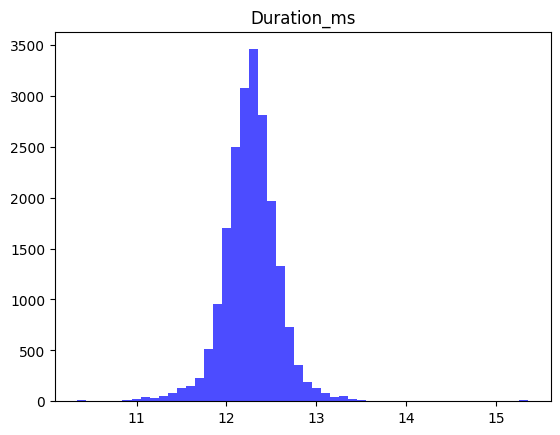

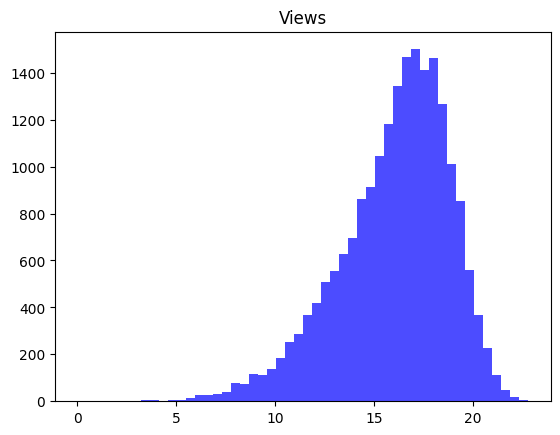

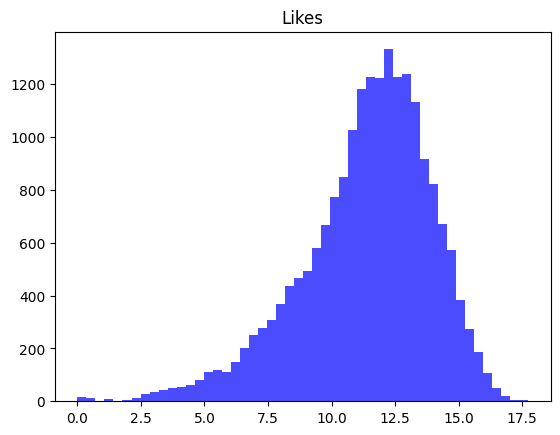

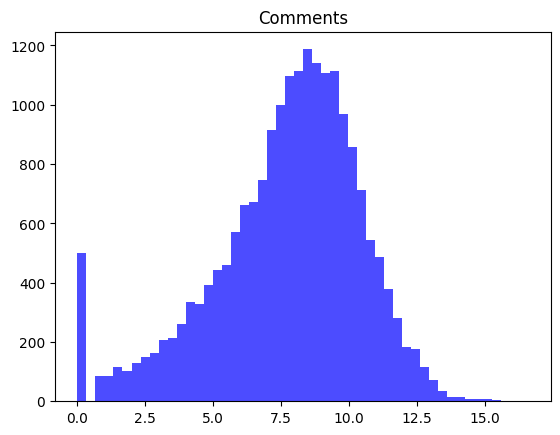

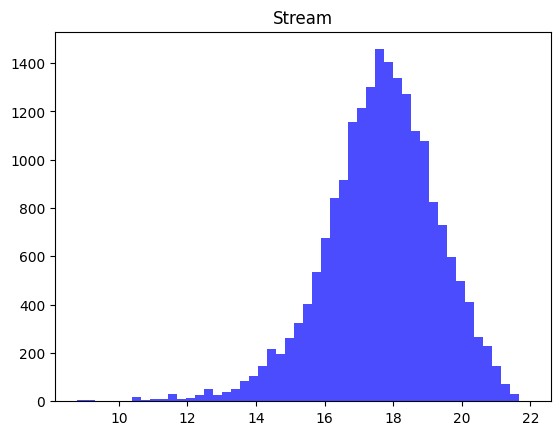

In [14]:
logarithmic_categories = ["Duration_ms", "Views", "Likes", "Comments", "Stream"]
for column in logarithmic_categories:
    plt.hist(np.log(df[column] + 1), bins=50, color='blue', alpha=0.7)
    plt.title(column)
    plt.xlabel('logarithmic scale')
    plt.ylabel('Frequency')
    plt.show()

We see here that after after applying a logarithmic transformation, the categories that were previously skewed now appear approximately normal. One anomaly is that a large number of data points have 0 comments. This is possibly because they are spotify exclusive, and thus don't have any comments on youtube. This raises the bigger issue of dealing with songs that are only on one platform or the other, which needs to be addressed in training and analysis. 